In [3]:
# imports
import os
import random
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
from utils.items import Item
from utils.loaders import ItemLoader
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pickle

In [4]:
load_dotenv()
HF_TOKEN = os.getenv("HF_TOKEN")

In [5]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [6]:
%matplotlib inline

In [7]:
dataset_names = [
    # "Automotive",
    # "Electronics",
    # "Office_Products",
    # "Tools_and_Home_Improvement",
    # "Cell_Phones_and_Accessories",
    # "Toys_and_Games",
    "Appliances",
    # "Musical_Instruments",
]

In [8]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Appliances


100%|██████████| 95/95 [04:25<00:00,  2.79s/it]  


Completed Appliances with 28,625 datapoints in 4.7 mins


In [9]:
print(f"A grand total of {len(items):,} items")

A grand total of 28,625 items


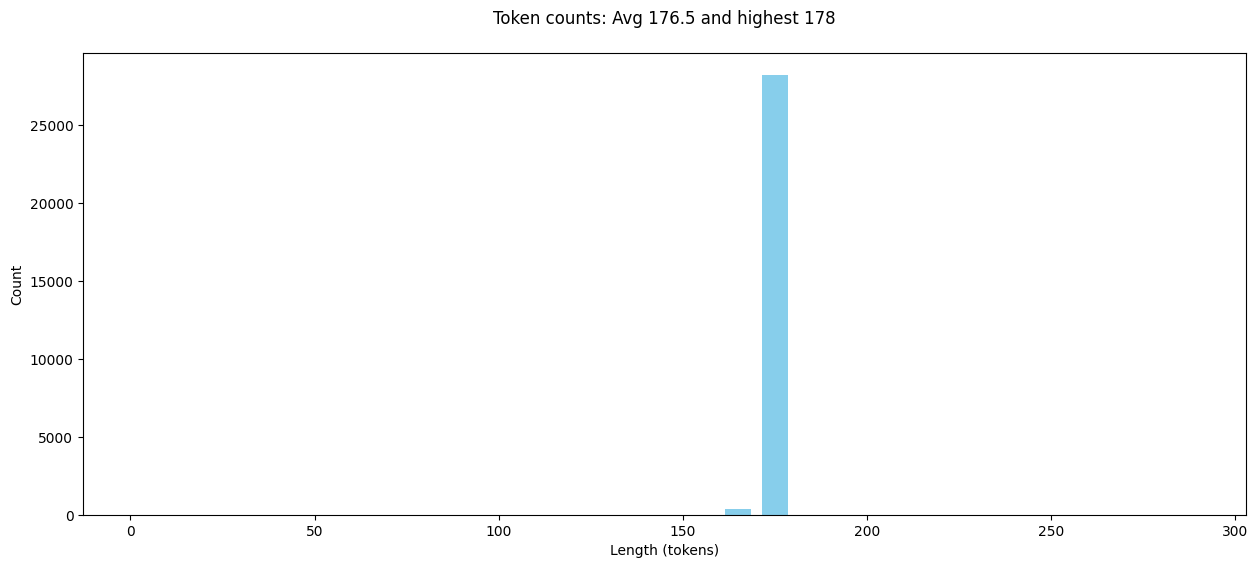

In [10]:
# Plot the distribution of token counts again

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="skyblue", bins=range(0, 300, 10))
plt.show()

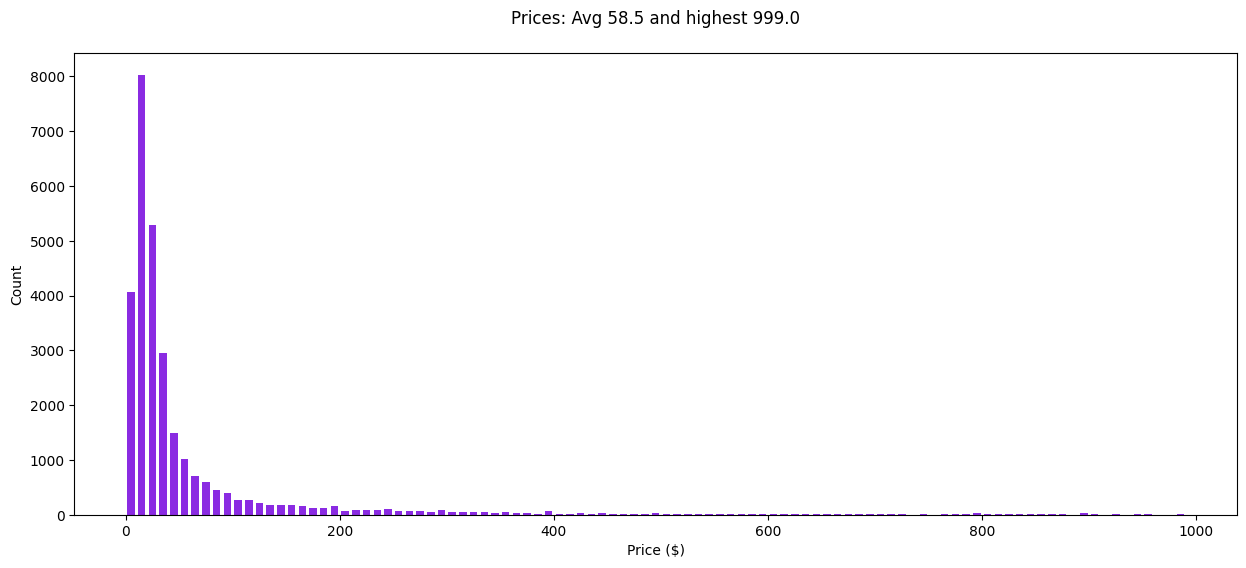

In [11]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

In [12]:
def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print(prompt)
    print(tokens[-10:])
    print(Item.tokenizer.batch_decode(tokens[-10:]))

In [19]:
sample = items
print(len(sample))
random.seed(42)
random.shuffle(sample)
train = sample[:int(0.8 * len(sample))]
test = sample[int(0.8 * len(sample)):]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")

28625
Divided into a training set of 22,900 items and test set of 5,725 items


In [20]:
def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print(prompt)
    print(tokens[-10:])
    print(Item.tokenizer.batch_decode(tokens[-10:]))

report(sample[50])

How much does this cost to the nearest dollar?

Walmine Black Dryer Door Handle Replacement for Whirlpool, Replace
Features 1.The handle is mainly made of black plastic. The product material is good and not easy to be damaged. It is a good substitute to replace old and damaged products. 2.Easy to use and install, without too many complicated operation steps. Replace and install according to your own needs. Brands Replacement for Whirlpool, Replacement for Kenmore, Replacement for GE, Replacement for Maytag, Replacement for Amana, etc. Part Numbers Models Replacement for Kenmore etc. Note The distance between installation holes is 7.24 inches. Please check the distance between installation holes of your existing products when purchasing. Specifications Material Plastic Color Black Handle Length Distance Between Mounting Holes Size Weight 227g Package include

Price is $10.00
[70, 17333, 2997, 271, 7117, 374, 400, 605, 13, 410]
['g', ' Package', ' include', '\n\n', 'Price', ' is', ' $', 

In [21]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [23]:
# Create a Dataset from the lists

train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [24]:
DATASET_NAME = "rohitsharma77/lite-data"
dataset.push_to_hub(DATASET_NAME, private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/rohitsharma77/lite-data/commit/8c1f35558b6f5bc9dcba5ea6285805f5cac32d53', commit_message='Upload dataset', commit_description='', oid='8c1f35558b6f5bc9dcba5ea6285805f5cac32d53', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/rohitsharma77/lite-data', endpoint='https://huggingface.co', repo_type='dataset', repo_id='rohitsharma77/lite-data'), pr_revision=None, pr_num=None)